In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'
import matplotlib as mpl
import pandas as pd
import numpy as np
from iminuit import Minuit
from scipy import stats
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import os, sys
sys.path.append('..')
from functions import read_data, overview_plot_leak, dict_for_treatment, fit_exp, plot_fit
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH, nice_string_output, add_text_to_ax

In [2]:
path = '../../../KU/Bachelor+Research/Data/Axetris/Own setup/'

leak_test = read_data(path)

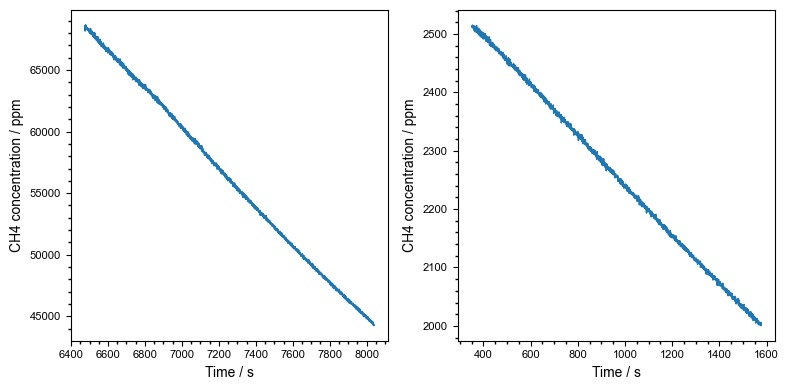

In [3]:
fig, ax = plt.subplots(1,2, figsize = (8, 4))

overview_plot_leak(ax[0], leak_test['Leak_test1_05032024'][4400:7600])
overview_plot_leak(ax[1], leak_test['Leak_test2_05032024'][700:-1])

fig.tight_layout()
fig.savefig('leak_test.png', dpi = 600)
plt.show()

In [4]:
idx_leak = np.array([[4400, 7600], [700, -1]])

leak_treat = dict_for_treatment(leak_test, idx_leak)

c:\Users\nan25\OneDrive\Dokumenter\GitHub\Manganese-chlorides\ISAMO\functions.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seconds'] = df['Seconds'] - df['Seconds'][0]


In [5]:
a_guess = [-1, -1]
b_guess = [65000, 2000]
array_a, array_b, array_ea, array_eb, array_Chi2, array_ndf, array_Prob = fit_exp(leak_treat, a_guess, b_guess)

Leak_test1_05032024  Fit: a=-0.000279+-0.00000018  b=69407.197+-9.787  p=0.000000
Leak_test2_05032024  Fit: a=-0.000188+-0.00000627  b=2526.759+-10.555  p=1.000000


C:\Users\nan25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


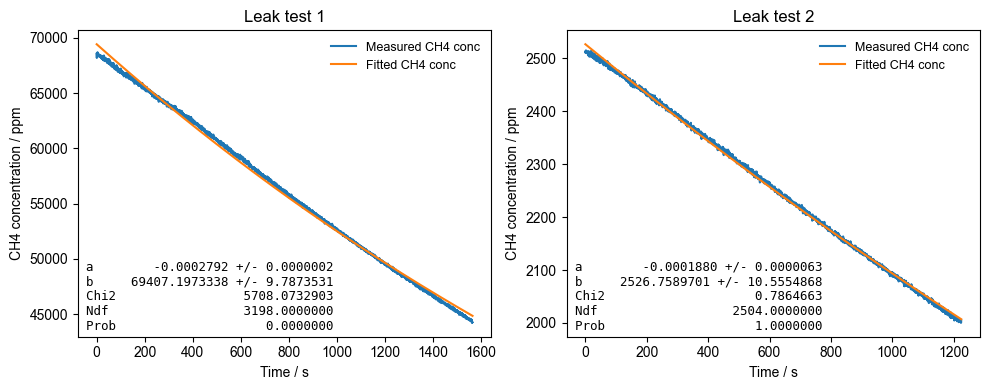

In [6]:
fig, ax = plt.subplots(1,2, figsize = (10, 4))

for i, key in enumerate(leak_treat.keys()):
    plot_fit(ax[i], leak_treat[key], array_a[i], array_b[i], array_ea[i], array_eb[i], array_Chi2[i], array_ndf[i], array_Prob[i])
ax[0].set_title('Leak test 1')
ax[1].set_title('Leak test 2')

fig.tight_layout()
fig.savefig('Fitted_leak.png', dpi = 600)
plt.show()